In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
X=np.arange(0,5,0.1)
print(X)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9]


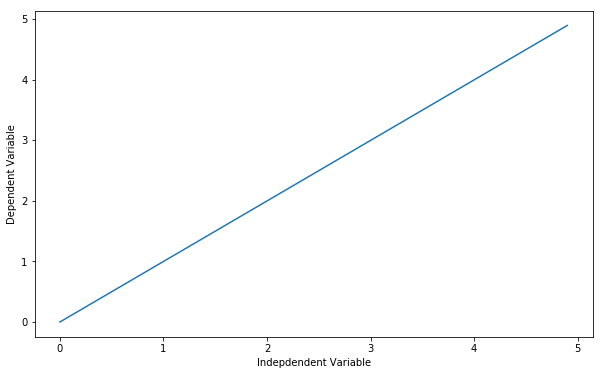

In [4]:
a=1
b=0

Y= a*X + b 

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [5]:
x_data = np.random.rand(100).astype(np.float32)
print(x_data.dtype)

float32


In [6]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)
list(zip(x_data,y_data))[0:5]

[(0.034312092, 2.028052632052781),
 (0.96115631, 4.9756202011848689),
 (0.55407947, 3.7118155926193137),
 (0.74073267, 4.2723006614822276),
 (0.90556347, 4.9298400863319713)]

In [10]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [11]:
loss = tf.reduce_mean(tf.square(y - y_data))
print(loss)
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Tensor("Mean_1:0", shape=(), dtype=float32)


In [21]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
train_data = []

In [22]:
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5492063, 2.9743803]
5 [2.5141883, 2.2570221]
10 [2.6967018, 2.1616044]
15 [2.82026, 2.0964453]
20 [2.9040644, 2.0522513]
25 [2.9609058, 2.0222762]
30 [2.9994586, 2.0019455]
35 [3.0256076, 1.988156]
40 [3.0433433, 1.978803]
45 [3.0553725, 1.9724594]
50 [3.0635316, 1.9681568]
55 [3.0690656, 1.9652385]
60 [3.072819, 1.9632591]
65 [3.0753646, 1.9619166]
70 [3.0770915, 1.961006]
75 [3.0782623, 1.9603885]
80 [3.0790567, 1.9599696]
85 [3.0795956, 1.9596856]
90 [3.0799611, 1.9594928]
95 [3.0802088, 1.9593621]


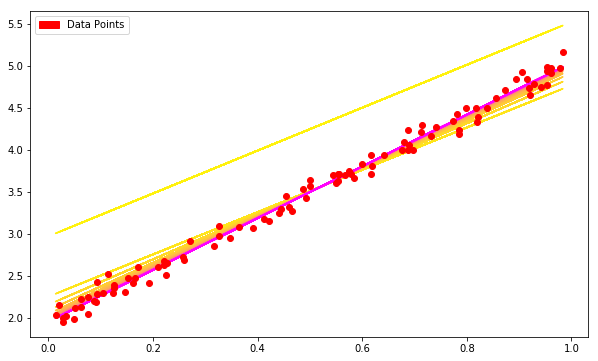

In [24]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()